In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
transaction_data = pd.read_csv(r'/content/fact__paper__digital_payment_transaction_cleaned (3).csv')

In [ ]:
#transaction_data = pd.read_csv(r'/content/drive/MyDrive/fact_paper_digital_payment_transaction_cleaned.csv')

In [ ]:
transaction_data.head()

,dpt_id,dpt_promotion_id,buyer_id,seller_id,transaction_amount,payment_method_name,payment_provider_name,transaction_created_datetime,transaction_updated_datetime,interaction_count,buyer_seller_relationship_score,time_gap_seconds,irregular_time_gap_flag,promo_usage_count,promo_exploitation_flag
0,69e9566b3f4d6cb7db2216121b0cd0308c516e680e9c78...,Unknown,bbce610a3267808752a7ec263a7ecfbe76a4987d529bcb...,5d2233f5a1a6435891142442fac09a77809d0c16496f07...,-0.131489,MITRA_PEMBAYARAN_DIGITAL,BLIBLI,2023-08-16 09:00:53.297729,2023-08-16 10:24:56.875352,18,0.014218,5.617962e+02,1,18,0
1,961d6f7efde3622da8f35e76e2b53acd84c647a661de86...,Unknown,09eb3b80abae1238ef39d50b66215e02e1ac9891ad6e8f...,5d2233f5a1a6435891142442fac09a77809d0c16496f07...,-0.131899,MITRA_PEMBAYARAN_DIGITAL,BLIBLI,2023-06-09 15:22:49.867524,2023-06-09 15:23:42.718184,13,0.010269,2.601852e+04,0,13,0
2,6441defc089b4ae947cce529904a5c7db2326ede52bdaa...,Unknown,25d0774533d69564d0deca724a55a76c693ed5f7ffa12a...,5d2233f5a1a6435891142442fac09a77809d0c16496f07...,-0.060195,MITRA_PEMBAYARAN_DIGITAL,TOKOPEDIA,2023-10-08 10:45:24.139583,2023-10-09 11:47:23.938359,7,0.005529,5.243862e+06,0,7,0
3,64152dd86b2c5d1af6aaa911e7a229dc539273e0a7b8be...,Unknown,5b846313375cb4f4d065e50a05833dc3ac20ba3f532bbe...,5b846313375cb4f4d065e50a05833dc3ac20ba3f532bbe...,-0.130797,MITRA_PEMBAYARAN_DIGITAL,BLIBLI,2023-05-26 13:41:27.133014,2023-05-26 13:47:40.595121,11,0.008689,2.134060e+06,0,11,0
4,ae4ddde99c8fe7f73fb3c2ee0e157e886b52417ece17bd...,Unknown,5c19a13a9b229340b584f621b648f4dec7491e12368392...,5c19a13a9b229340b584f621b648f4dec7491e12368392...,-0.061093,MITRA_PEMBAYARAN_DIGITAL,TOKOPEDIA,2023-05-26 17:29:34.201724,2023-05-26 17:30:04.688498,7,0.005529,2.009353e+06,0,7,0


In [ ]:
# Outliers untuk keperluan analisis
Q1 = transaction_data['transaction_amount'].quantile(0.25)
Q3 = transaction_data['transaction_amount'].quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas bawah dan atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# jumlah outliers
outliers = transaction_data[(transaction_data['transaction_amount'] <= lower_bound) | (transaction_data['transaction_amount'] >= upper_bound)]
print("jumlah outliers:", outliers.shape[0])

jumlah outliers: 6777


# Exploratory Data Analysis

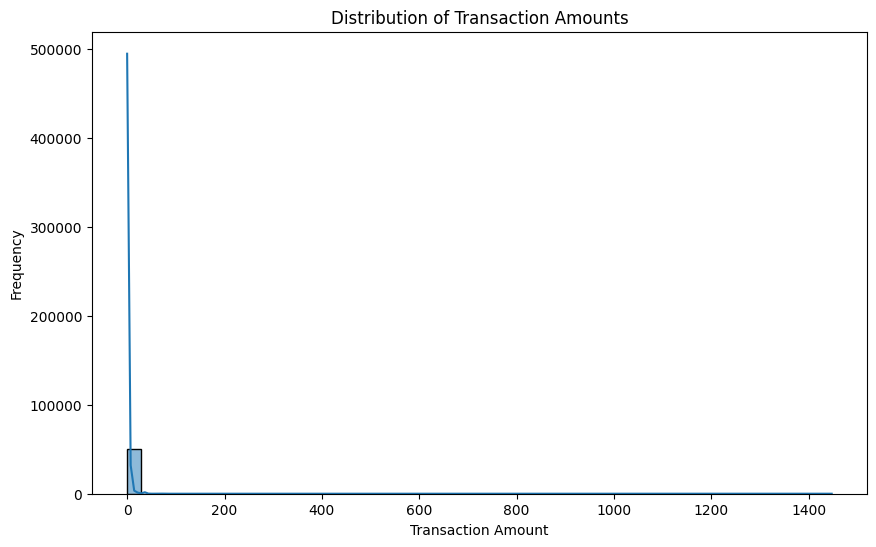

In [ ]:
#Distribution of transaction amounts
plt.figure(figsize=(10,6))
sns.histplot(transaction_data['transaction_amount'], bins=50, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

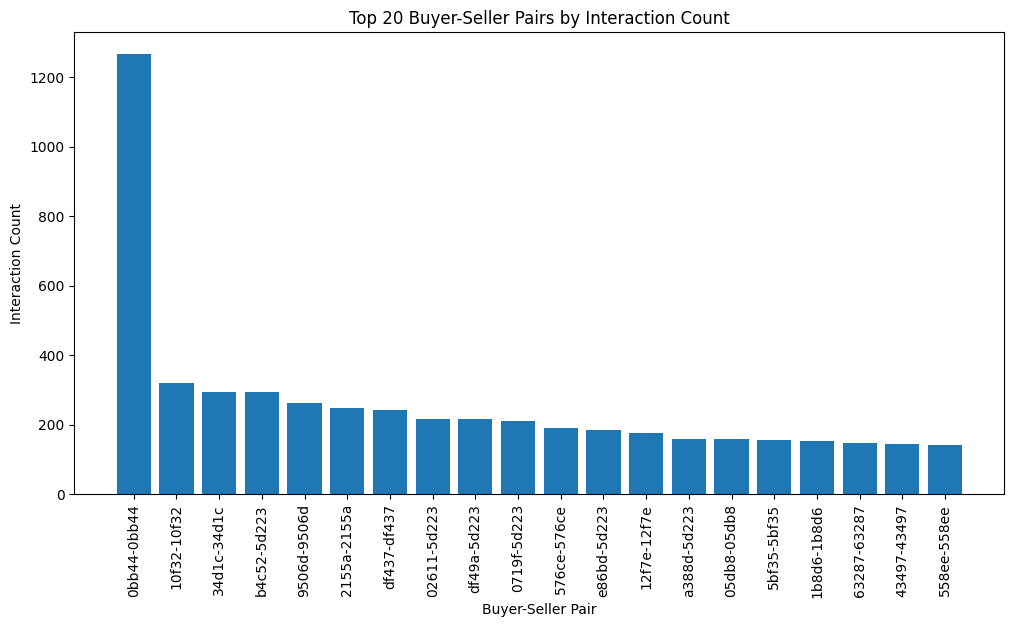

In [ ]:
#Frequencies of buyer-seller pairs

# Filter pairs with interaction count > 5
filtered_pairs = transaction_data[transaction_data['interaction_count'] > 5]

# Drop duplicate pairs, keeping the highest interaction_count
filtered_pairs = filtered_pairs.sort_values(by='interaction_count', ascending=False).drop_duplicates(subset=['buyer_id', 'seller_id'])

# Sort by interaction count and take top 20
top_20_pairs = filtered_pairs.sort_values(by='interaction_count', ascending=False).head(20)

# Trim buyer and seller IDs to 5 characters for better readability
top_20_pairs['buyer_id_trimmed'] = top_20_pairs['buyer_id'].astype(str).str[:5]
top_20_pairs['seller_id_trimmed'] = top_20_pairs['seller_id'].astype(str).str[:5]

# Combine buyer and seller IDs
top_20_pairs['buyer_seller_pair'] = top_20_pairs['buyer_id_trimmed'] + '-' + top_20_pairs['seller_id_trimmed']

# Plot
plt.figure(figsize=(12, 6))
plt.bar(top_20_pairs['buyer_seller_pair'], top_20_pairs['interaction_count'])
plt.xticks(rotation=90)
plt.title('Top 20 Buyer-Seller Pairs by Interaction Count')
plt.xlabel('Buyer-Seller Pair')
plt.ylabel('Interaction Count')
plt.show()

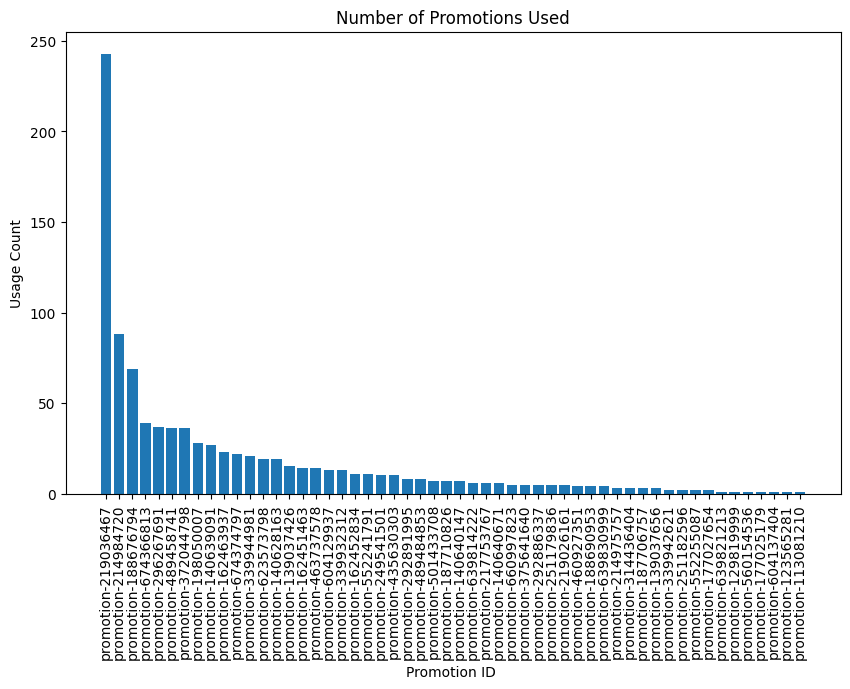

In [ ]:
#Usage of promotions

# Mengecualikan nilai 'unknown'
promotion = transaction_data[transaction_data['dpt_promotion_id'] != 'Unknown']

# Menghitung jumlah penggunaan promosi
promotion_usage = promotion.groupby('dpt_promotion_id').size().reset_index(name='usage_count')

# Mengurutkan dari penggunaan tertinggi ke terrendah
promotion_usage = promotion_usage.sort_values(by='usage_count', ascending=False)

# Membuat barplot
plt.figure(figsize=(10, 6))
plt.bar(promotion_usage['dpt_promotion_id'], promotion_usage['usage_count'])
plt.xlabel('Promotion ID ')
plt.ylabel('Usage Count')
plt.title('Number of Promotions Used')
plt.xticks(rotation=90)
plt.show()

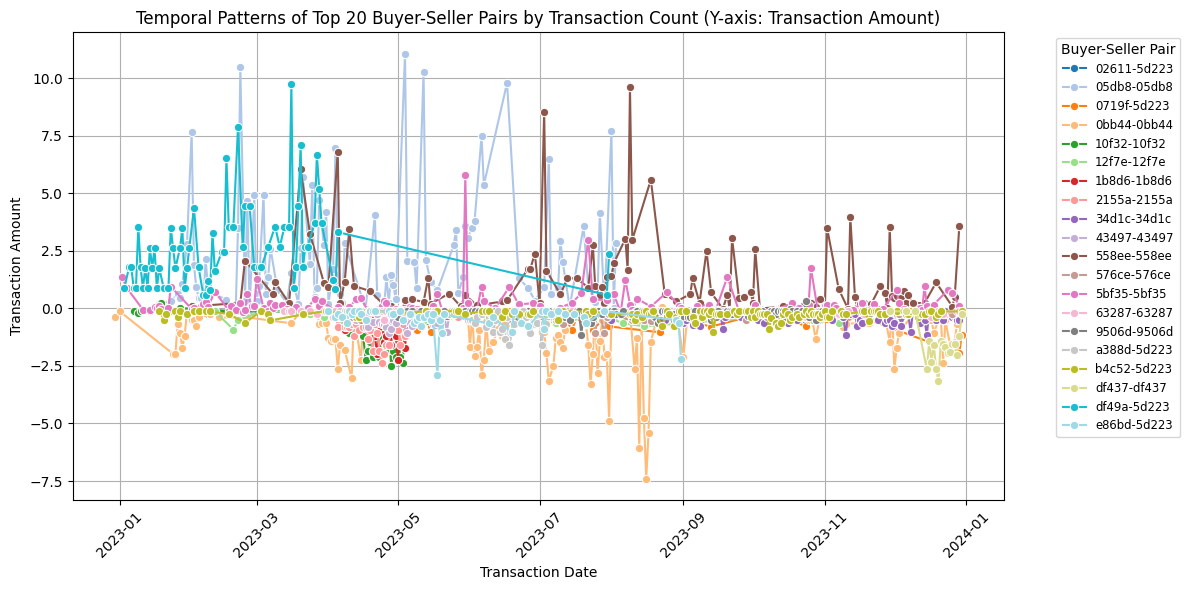

In [ ]:
#Investigate patterns in repeated transactions

# Convert transaction_date to datetime if not already
transaction_data['transaction_created_datetime'] = pd.to_datetime(transaction_data['transaction_created_datetime'])

# Trim buyer_id and seller_id to 5 characters
transaction_data['buyer_id_trimmed'] = transaction_data['buyer_id'].astype(str).str[:5]
transaction_data['seller_id_trimmed'] = transaction_data['seller_id'].astype(str).str[:5]

# Group by trimmed buyer-seller pairs and transaction_date to calculate transaction count
temporal_transactions = transaction_data.groupby(
    ['buyer_id_trimmed', 'seller_id_trimmed', transaction_data['transaction_created_datetime'].dt.date]
).agg(
    transaction_count=('transaction_amount', 'size'),  # Count transactions
    transaction_amount=('transaction_amount', 'sum')  # Sum of transaction amounts
).reset_index()

# Combine trimmed buyer-seller pairs for easier visualization
temporal_transactions['buyer_seller_pair'] = (
    temporal_transactions['buyer_id_trimmed'] + '-' + temporal_transactions['seller_id_trimmed']
)

# Calculate total transaction count for each pair
total_transactions_per_pair = temporal_transactions.groupby('buyer_seller_pair')['transaction_count'].sum()

# Sort pairs by total transaction count and take top 20
top_pairs = total_transactions_per_pair.nlargest(20).index

# Filter for top 20 pairs in the original data
top_repeated_transactions = temporal_transactions[temporal_transactions['buyer_seller_pair'].isin(top_pairs)]

# Plot using seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=top_repeated_transactions,
    x='transaction_created_datetime',
    y='transaction_amount',
    hue='buyer_seller_pair',
    palette=sns.color_palette("tab20", 20),
    marker='o'
)

plt.title('Temporal Patterns of Top 20 Buyer-Seller Pairs by Transaction Count (Y-axis: Transaction Amount)')
plt.xlabel('Transaction Date')
plt.ylabel('Transaction Amount')
plt.legend(title='Buyer-Seller Pair', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


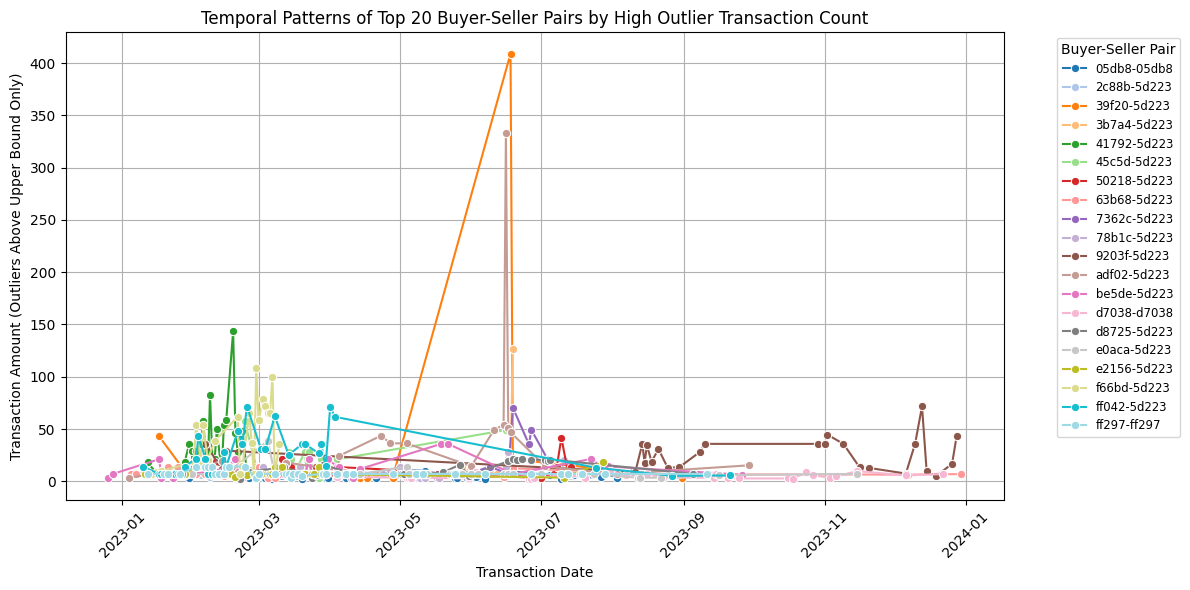

In [ ]:
#Investigate abnormally high transaction values

# Saring transaksi yang merupakan outliers positif
outliers = transaction_data[transaction_data['transaction_amount'] > upper_bound]

# Group outliers untuk menghitung transaction count dan transaction amount
outlier_transactions = outliers.groupby(
    ['buyer_id_trimmed', 'seller_id_trimmed', outliers['transaction_created_datetime'].dt.date]
).agg(
    transaction_count=('transaction_amount', 'size'),
    transaction_amount=('transaction_amount', 'sum')
).reset_index()

# Combine trimmed buyer-seller pairs for easier visualization
outlier_transactions['buyer_seller_pair'] = (
    outlier_transactions['buyer_id_trimmed'] + '-' + outlier_transactions['seller_id_trimmed']
)

# Calculate total transaction count for each pair from outliers
total_outlier_transactions = outlier_transactions.groupby('buyer_seller_pair')['transaction_count'].sum()

# Sort pairs by total transaction count and take top 20
top_outlier_pairs = total_outlier_transactions.nlargest(20).index

# Filter for top 20 pairs in the original data
top_outlier_transactions = outlier_transactions[outlier_transactions['buyer_seller_pair'].isin(top_outlier_pairs)]

# Plot menggunakan seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=top_outlier_transactions,
    x='transaction_created_datetime',
    y='transaction_amount',
    hue='buyer_seller_pair',
    palette=sns.color_palette("tab20", 20),
    marker='o'
)

plt.title('Temporal Patterns of Top 20 Buyer-Seller Pairs by High Outlier Transaction Count')
plt.xlabel('Transaction Date')
plt.ylabel('Transaction Amount (Outliers Above Upper Bound Only)')
plt.legend(title='Buyer-Seller Pair', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Visualization

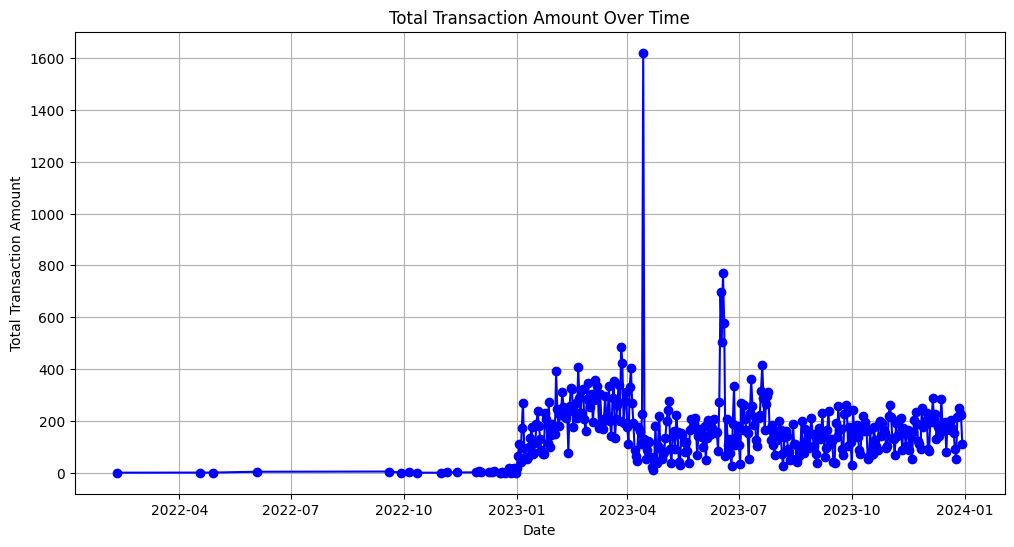

In [ ]:
#Transaction amount over time and identify suspicious spikes in activity

# Konversi kolom waktu ke format datetime
transaction_data['transaction_created_datetime'] = pd.to_datetime(transaction_data['transaction_created_datetime'])

# Grupkan transaksi berdasarkan waktu (misalnya per hari)
time_series_data = transaction_data.groupby(transaction_data['transaction_created_datetime'].dt.date)['transaction_amount'].sum()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(time_series_data.index, time_series_data.values, marker='o', linestyle='-', color='blue')
plt.title('Total Transaction Amount Over Time')
plt.xlabel('Date')
plt.ylabel('Total Transaction Amount')
plt.grid()
plt.show()


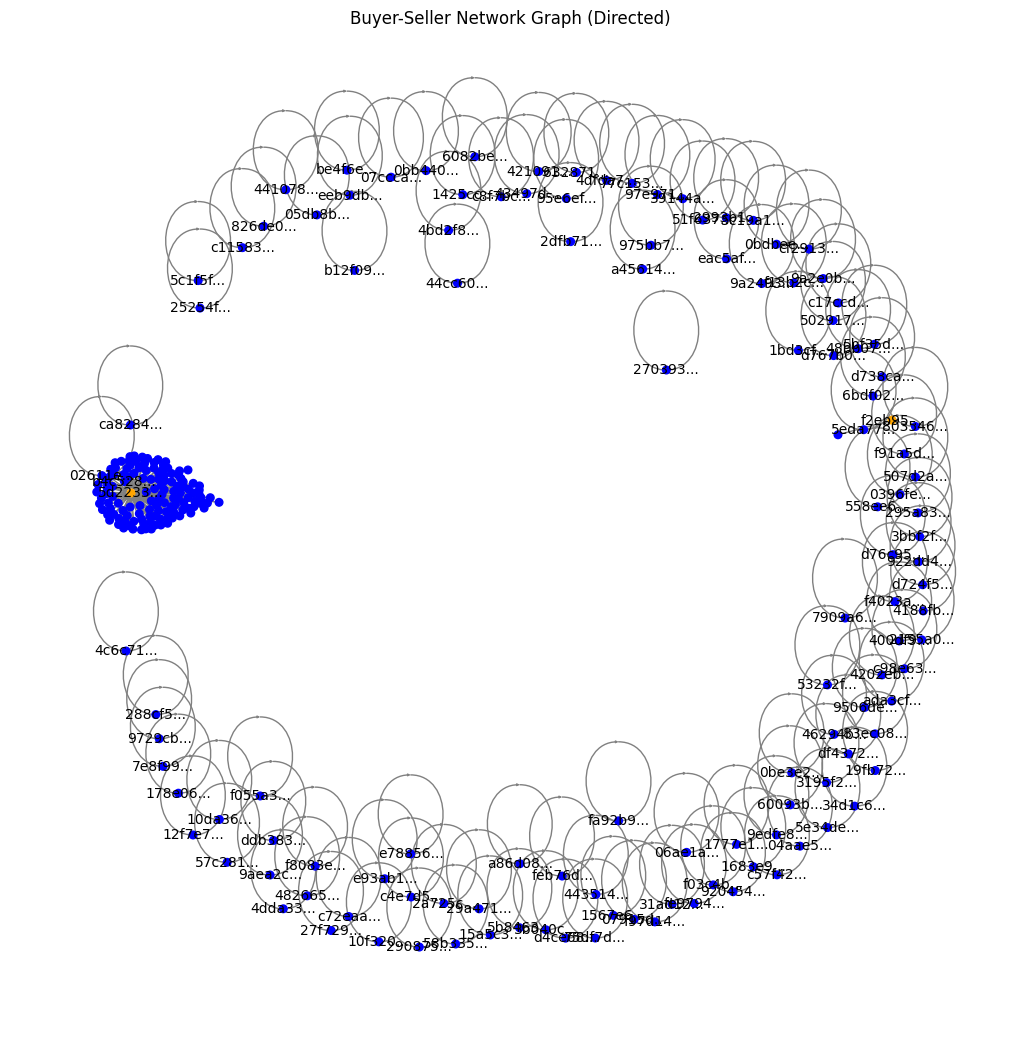

In [ ]:
#Buyer-seller network graphs to detect relationship between users

import networkx as nx
# 1. Hapus duplikat berdasarkan pasangan dengan arah
data_no_duplicated = transaction_data.drop_duplicates(subset=['buyer_id', 'seller_id'])

# 2. Ambil 50 data pertama
subset_data = data_no_duplicated.head(250)

# 3. Buat graph terarah (Directed Graph)
buyer_seller_graph = nx.from_pandas_edgelist(
    subset_data,
    source='buyer_id',
    target='seller_id',
    edge_attr=True,
    create_using=nx.DiGraph()
)

# 4. Identifikasi buyer dan seller untuk membedakan warna node
buyers = set(subset_data['buyer_id'])
sellers = set(subset_data['seller_id'])

# Tetapkan warna node
node_colors = []
for node in buyer_seller_graph.nodes():
    if node in buyers:
        node_colors.append('blue')
    elif node in sellers:
        node_colors.append('orange')
    else:
        node_colors.append('gray')

# 5. Membuat label trimmed untuk seller_id
labels = {
    node: f"{node[:6]}..." for node in buyer_seller_graph.nodes() if node in sellers
}

# 6. Visualisasi graph dengan label hanya pada seller_id
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(buyer_seller_graph)

# Gambarkan graph
nx.draw(
    buyer_seller_graph,
    pos,
    with_labels=False,
    node_size=30,
    node_color=node_colors,
    edge_color='gray',
    arrowsize=3
)

# Tambahkan label trimmed hanya untuk seller_id
nx.draw_networkx_labels(buyer_seller_graph, pos, labels, font_size=10, font_color='black')

plt.title('Buyer-Seller Network Graph (Directed)')
plt.show()


Terlihat Seller ID **5d2233** memiliki banyak relationship dengan buyer yang berbeda, sedangkan pengguna lain melakukan interaksi dengan dirinya sendiri

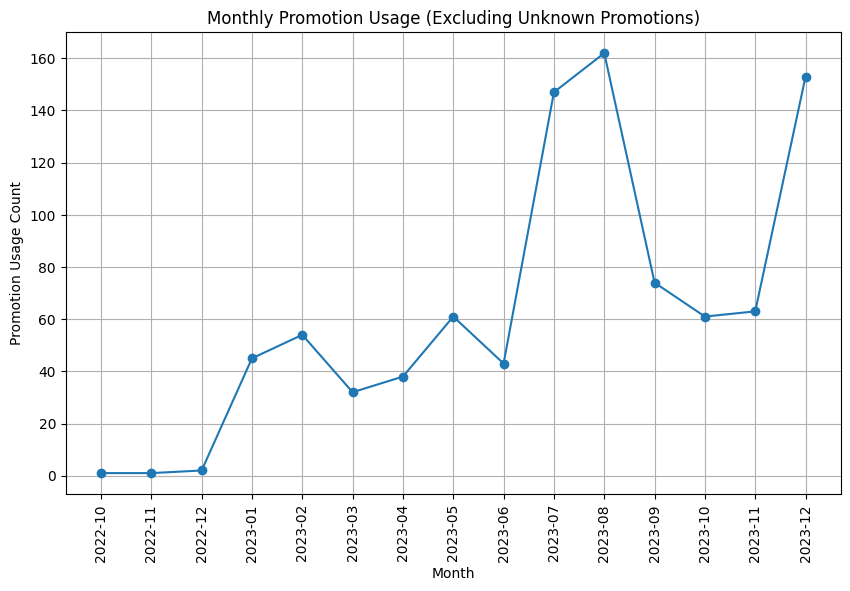

In [ ]:
#Visualize promotional activity

# Extract month from transaction_date
transaction_data['month'] = transaction_data['transaction_created_datetime'].dt.to_period('M')

# Exclude rows with dpt_promotion_id == 'Unknown'
filtered_data = transaction_data[transaction_data['dpt_promotion_id'] != 'Unknown']

# Group by month and count dpt_promotion_id usage
monthly_promo_usage = filtered_data.groupby('month').size().reset_index(name='promo_usage_count')

# Convert 'month' column to string representation before plotting
monthly_promo_usage['month'] = monthly_promo_usage['month'].astype(str)  # Convert to string

# Plot
plt.figure(figsize=(10, 6))
plt.xticks(rotation=90)
plt.plot(monthly_promo_usage['month'], monthly_promo_usage['promo_usage_count'], marker='o')
plt.title('Monthly Promotion Usage (Excluding Unknown Promotions)')
plt.xlabel('Month')
plt.ylabel('Promotion Usage Count')
plt.grid()
plt.show()

Pengunaan promo meningkat tajam dibandingkan bulan lain pada bulan Juli 2023, Agustus 2023, dan Desember 2023. Terdapat indikasi bahwa ada beberapa promo yang disalahgunakan oleh pengguna

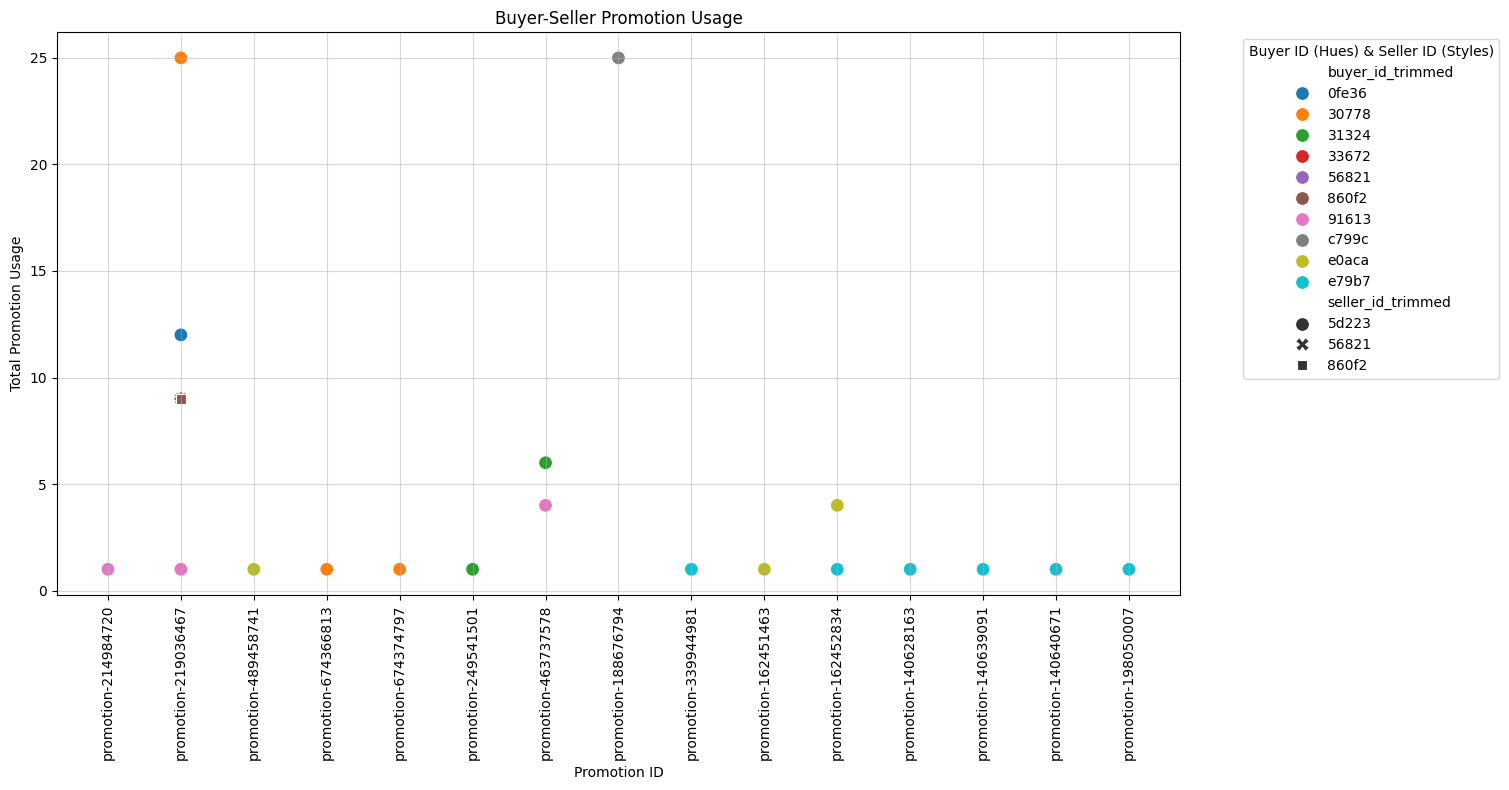

In [ ]:
#Identify patterns of misuse
# Group data by buyer_id_trimmed, seller_id, and dpt_promotion_id to calculate total promo usage
buyer_seller_promo_usage = transaction_data.groupby(
    ['buyer_id_trimmed', 'seller_id_trimmed', 'dpt_promotion_id']
)['promo_usage_count'].sum().reset_index()


# Mengecualikan 'Unknown' pada dpt_promotion_id
buyer_seller_promo_usage = buyer_seller_promo_usage[
    buyer_seller_promo_usage['dpt_promotion_id'] != 'Unknown'
]


# Calculate total promo usage per buyer-seller pair
buyer_seller_total_usage = buyer_seller_promo_usage.groupby(
    ['buyer_id_trimmed', 'seller_id_trimmed']
)['promo_usage_count'].sum().reset_index()


# Filter to top 10 buyer-seller pairs by total promo usage
top_pairs = buyer_seller_total_usage.sort_values(
    by='promo_usage_count', ascending=False
).head(10)


# Merge with the main dataset to filter the details for visualization
filtered_data = buyer_seller_promo_usage[
    (buyer_seller_promo_usage['buyer_id_trimmed'].isin(top_pairs['buyer_id_trimmed'])) &
    (buyer_seller_promo_usage['seller_id_trimmed'].isin(top_pairs['seller_id_trimmed']))
]


# Plot
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=filtered_data,
    x='dpt_promotion_id',
    y='promo_usage_count',
    hue='buyer_id_trimmed',
    style='seller_id_trimmed',
    s=100,
    palette='tab10'
)


# Add labels and title
plt.title('Buyer-Seller Promotion Usage')
plt.xlabel('Promotion ID')
plt.ylabel('Total Promotion Usage')


# Adjust layout
plt.xticks(rotation=90)
plt.grid(alpha=0.5)
plt.tight_layout()
plt.legend(title='Buyer ID (Hues) & Seller ID (Styles)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


Terlihat Buyer ID **30778** dan **C799C** menggunakan promo yang sama secara berulang kali, hal ini memiliki indikasi mereka menyalahgunakan penggunaan promo. Selain itu beberapa buyer juga menggunakan promo yang sama lebih dari 1x.